<div style="text-align:center">Marco Seiz, Michael Kellner, Anastasia August<br>
KIT, Institut für Angewandte Materialien (IAM)<br>
Computational Materials Science (CMS)
</div>
<h1>Mikrostruktursimulation <br/>Rechnerübung Berechnung von Phasendiagrammen WS 21/22</h1>

In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import matplotlib as mpl
import math
import numpy as np
from sympy import *
import time
from scipy.optimize import fsolve
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
init_printing()
mpl.rcParams.update({'font.size': 16})
mpl.rcParams['figure.figsize'] = (9,6)
mpl.rcParams['axes.grid'] = True
import warnings
from matplotlib import MatplotlibDeprecationWarning
warnings.filterwarnings('ignore', category=MatplotlibDeprecationWarning)


In [2]:
R_val = 8.314 # universelle Gaskonstante
T_M_A_alpha_val = .8
T_M_B_alpha_val = 1.25
T_M_A_beta_val = 1.2
T_M_B_beta_val = .75
L_A_alpha_val = 60
L_B_alpha_val = 60
L_A_beta_val = 80
L_B_beta_val = 25
T_low_val = .6
T_high_val = 1.4

R = symbols('R', real=True)
T_M_A_alpha = symbols('T_{MA\\alpha}', real=True, positive=True)
T_M_B_alpha = symbols('T_{MB\\alpha}', real=True, positive=True)
T_M_A_beta = symbols('T_{MA\\beta}', real=True, positive=True)
T_M_B_beta = symbols('T_{MB\\beta}', real=True, positive=True)
L_A_alpha = symbols('L_{A\\alpha}', real=True, positive=True)
L_B_alpha = symbols('L_{B\\alpha}', real=True, positive=True)
L_A_beta = symbols('L_{A\\beta}', real=True, positive=True)
L_B_beta = symbols('L_{B\\beta}', real=True, positive=True)
T_low = symbols('T_{\\text{low}}', real=True, positive=True)
T_high = symbols('T_{\\text{high}}', real=True, positive=True)
x = symbols('x', real=True, positive=True)
T = symbols('T', real=True, positive=True)
xlab = "$x_A$ bzw. $1-x_B$"

def subs_constants(expr):
    return (expr.subs(R, R_val)
                .subs(T_M_A_alpha,T_M_A_alpha_val)
                .subs(T_M_B_alpha,T_M_B_alpha_val)
                .subs(T_M_A_beta, T_M_A_beta_val)
                .subs(T_M_B_beta, T_M_B_beta_val)
                .subs(L_A_alpha, L_A_alpha_val)
                .subs(L_B_alpha, L_B_alpha_val)
                .subs(L_A_beta, L_A_beta_val)
                .subs(L_B_beta, L_B_beta_val)
                .subs(T_low, T_low_val)
                .subs(T_high, T_high_val))

<h3>Aufgabe 1a)<br/>
Gibbsenergiegleichungen
</h3>

Es liegt ein Gemisch aus den Komponenten A und B vor, bei dem die drei Phasen $L$, $\alpha$, und $\beta$  beobachtet werden.
Weiterhin sind die Gibbsenergiekurven der drei Phasen als Funktion des Stoffmengenanteils $x_A = x$ und der Temperatur $T$ bekannt. Visualisieren Sie die Gibbsenergien für verschiedene Temperaturen und stellen Sie eine Hypothese auf, wie das Phasendiagramm aussehen wird.

Bei hohen Temperaturen liegt das System komplett flüssig vor. Darunter bilden sich auf der A- bzw. B-reichen Seite die Primärphasen $\alpha$ bzw. $\beta$ aus. Zwischen T=1.15 und T=1.1 könnte ein Dreiphasengleichgewicht vorliegen, da hier eine Dreifachtangente existieren kann. Das Phasendiagramm sollte insofern ein Eutektikum aufweisen. 

In [3]:
# Gibbs-Energie der flüssigen Phase
G_L = R*T*(x*ln(x)+(1-x)*ln(1-x))
G_L_f = lambdify([x, T], subs_constants(G_L))
display(G_L)

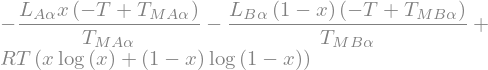

In [4]:
# Gibbs-Energie der Phasen alpha, beta
G_alpha = R*T*(x*ln(x)+(1-x)*ln(1-x))-x*L_A_alpha*(T_M_A_alpha-T)/T_M_A_alpha-(1-x)*L_B_alpha*(T_M_B_alpha-T)/T_M_B_alpha
G_alpha_f = lambdify([x, T], subs_constants(G_alpha))
display(G_alpha)

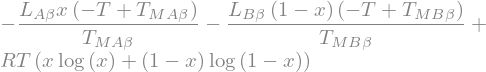

In [5]:
G_beta = R*T*(x*ln(x)+(1-x)*ln(1-x))-x*L_A_beta*(T_M_A_beta-T)/T_M_A_beta-(1-x)*L_B_beta*(T_M_B_beta-T)/T_M_B_beta
G_beta_f = lambdify([x, T], subs_constants(G_beta))
display(G_beta)

<IPython.core.display.Javascript object>


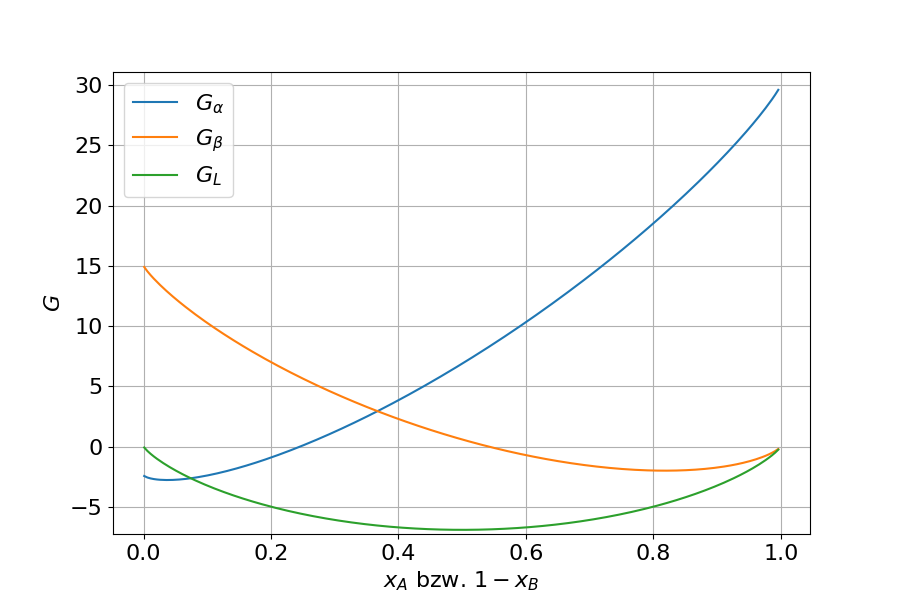

In [6]:
xx = np.arange(.001,.999,.005)
Galpha = [subs_constants(G_alpha).subs(T,1.1).subs(x,xi) for xi in xx]
Gbeta = [subs_constants(G_beta).subs(T,1.1).subs(x,xi) for xi in xx]
GL = [subs_constants(G_L).subs(T,1.1).subs(x,xi) for xi in xx]
fig_Diff, ax_Diff = plt.subplots()
lineGa, = ax_Diff.plot(xx, Galpha, label=r"$G_\alpha$")
lineGb, = ax_Diff.plot(xx, Gbeta, label=r"$G_\beta$")
lineGL, = ax_Diff.plot(xx, GL, label="$G_L$")
ax_Diff.set_xlabel(xlab)
ax_Diff.set_ylabel("$G$")
ax_Diff.legend()
fig_Diff.canvas.draw()

def gibbsplot(T_val):
    Galpha = [G_alpha_f(xi, T_val) for xi in xx]
    Gbeta = [G_beta_f(xi, T_val)  for xi in xx]
    GL = [G_L_f(xi, T_val)  for xi in xx]
    lineGa.set_ydata(Galpha)
    lineGb.set_ydata(Gbeta)
    lineGL.set_ydata(GL)
    ymax = max(np.max(Galpha), np.max(Gbeta), np.max(GL))*1.05
    ymin = min(np.min(Galpha), np.min(Gbeta), np.min(GL))*1.05
    ax_Diff.set_ylim([ymin, ymax])
    ax_Diff.legend()
    fig_Diff.canvas.draw()

In [7]:
interact(gibbsplot, T_val=widgets.BoundedFloatText(min=T_low_val, max=T_high_val, step=.05, value=1.2))

interactive(children=(BoundedFloatText(value=1.2, description='T_val', max=1.4, min=0.6, step=0.05), Output())…

<function __main__.gibbsplot(T_val)>

<h3>Aufgabe 1b)<br/>
Gleichgewichtsberechnung für ein Dreiphasengleichgewicht
</h3>

Überprüfen Sie, ob für das System eine eutektische Reaktion  vorliegt.  Diese ist in binären Systemen dadurch definiert, dass bei der eutektischen Temperatur die Flüssigphase mit beiden Festphasen im Gleichgewicht vorliegt und darunter in diese beiden Phasen zerfällt, oder in kurz: $L \to \alpha + \beta$

Gehen Sie hierzu wie folgt vor: Definieren Sie zunächst die vier nötigen Gleichgewichtsbedingungen zwischen den drei Phasen. Lösen Sie diese danach mit dem nsolve-Befehl. Schätzen Sie die Startwerte (initialvalues) für die eutektischte Temperatur und den Konzentrationen in den einzelnen Phasen mit Hilfe des Gibbsenergiediagramms ab.


Hinweis: Alle verwendeten Konstanten können in einen Ausdruck mit Hilfe von subs_constants(Ausdruck) eingesetzt werden.

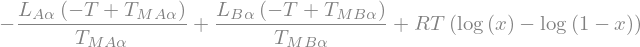

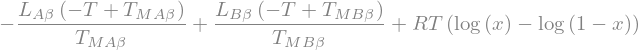

In [8]:
# Chemisches Potential der Phasen. Ableitungen der Gibbs Energien nach der Konzentration
dG_L_dx = diff(G_L,x)
display(dG_L_dx)
dG_alpha_dx = diff(G_alpha,x)
display(dG_alpha_dx)
dG_beta_dx = diff(G_beta,x)
display(dG_beta_dx)

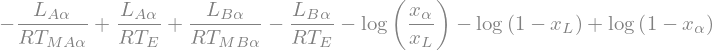

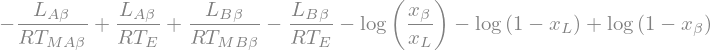

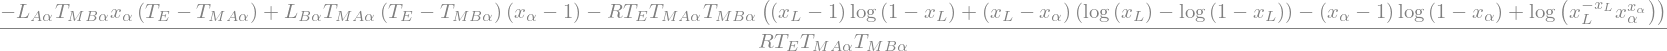

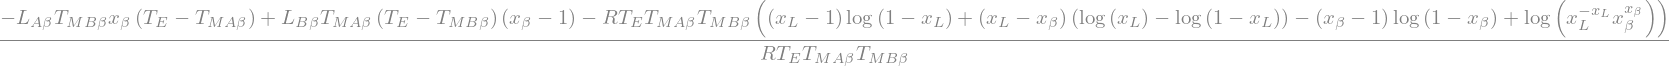

In [9]:
# Aufstellen der Gleichgewichte bei der eutektische Temperatur T_E
x_L = symbols('x_L', real=True, positive=True)
x_alpha = symbols(r'x_\alpha', real=True, positive=True)
x_beta = symbols(r'x_\beta', real=True, positive=True)
T_E = symbols('T_E', real=True, positive=True)
#die Reihenfolge der Gleichungen spielt keine Rolle, es müssen nur zwei Doppeltangenten vorliegen 
Gleichung1 = \
    simplify(((dG_L_dx.subs(x,x_L) - dG_alpha_dx.subs(x,x_alpha))/(R*T))).subs(T, T_E) 
display(Gleichung1)
Gleichung2 = \
    simplify((dG_L_dx.subs(x,x_L) - dG_beta_dx.subs(x,x_beta))/(R*T)).subs(T, T_E) 
display(Gleichung2)
Gleichung3 = \
    simplify(((G_L+dG_L_dx*(x_alpha-x_L)).subs(x,x_L) - G_alpha.subs(x,x_alpha))/(R*T)).subs(T, T_E) 
display(Gleichung3)
Gleichung4 = \
    simplify(((G_L+dG_L_dx*(x_beta-x_L)).subs(x,x_L) - G_beta.subs(x,x_beta))/(R*T)).subs(T, T_E) 
display(Gleichung4)


In [10]:
eqs = [Gleichung1, Gleichung2, Gleichung3, Gleichung4 ]
subs_eqs = [subs_constants(x) for x in eqs]
unknowns = [T_E, x_L, x_alpha, x_beta] # die Reihenfolge hier gibt die Reihenfolge für die Startwerte vor!
# also: zuerst eutektische Temperatur, dann jeweils die Konzentration in der Schmelze, alpha und beta
initialvalues = \
    [1.15, 0.5, 0.2, 0.7] 



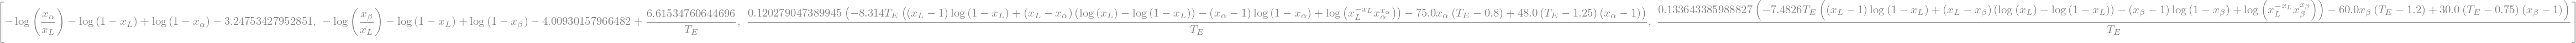

In [11]:
subs_eqs # hier sollten nur noch die Unbekannten aus unknowns vorkommen

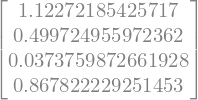

In [12]:
sol = nsolve(subs_eqs,unknowns,initialvalues)
display(sol)

In [13]:
Te = sol[0]
xle = sol[1]
xae = sol[2]
xbe = sol[3]
Te_val = float(Te)

<h3>Aufgabe 1c)<br/>
Tangentengleichung
</h3>

Stellen Sie nun die Tangente, die aus dem obigen Gleichgewicht folgt, graphisch dar. 
Nutzen Sie hierzu eine Gibbsenergiefunktion Ihrer Wahl sowie deren Ableitung und setzen Sie die Informationen des Dreiphasengleichgewichts via .subs() ein.

Welche Bedeutung hat der Schnittpunkt der Tangente mit den schwarzen Linien bei x=0 und x=1? Warum ist es unerheblich welche Phase zur Berechnung der Tangente genutzt wird?

Der Schnittpunkt entspricht dem großkanonischen Potential aller drei Phasen für die Komponente A (x=0) bzw. die Komponente B (x=1). Da das großkanonische Potential im Gleichgewicht zwischen allen beteiligten Phasen gleich ist, ist die Wahl der Phase bei der Berechnung unerheblich. 

In [14]:
Tangente = \
    subs_constants(G_alpha).subs(x,xae).subs(T, Te) + subs_constants(dG_alpha_dx).subs(x,xae).subs(T, Te)*(x-xae) 
display(Tangente) 

<IPython.core.display.Javascript object>


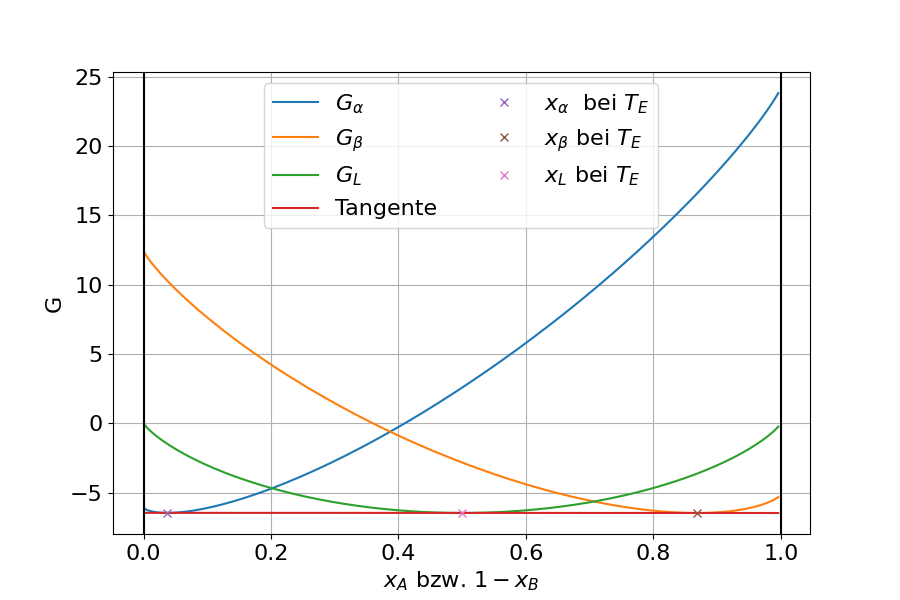

In [15]:
fig_GTE, ax_GTE = plt.subplots()
ax_GTE.set_xlabel(xlab)
ax_GTE.set_ylabel("G")

xx = np.arange(.001,.999,.005)
G_alpha_plot = [subs_constants(G_alpha).subs(T,Te).subs(x,xi) for xi in xx]
ax_GTE.plot(xx,G_alpha_plot, label='$G_\\alpha$')
G_beta_plot = [subs_constants(G_beta).subs(T,Te).subs(x,xi) for xi in xx]
ax_GTE.plot(xx,G_beta_plot, label='$G_\\beta$')
G_L_plot = [subs_constants(G_L).subs(T,Te).subs(x,xi) for xi in xx]
ax_GTE.plot(xx,G_L_plot, label='$G_L$')
Tangente_plot = [Tangente.subs(x,xi) for xi in xx]
ax_GTE.plot(xx,Tangente_plot, label='Tangente')
ax_GTE.plot(xae, subs_constants(G_alpha).subs(x,xae).subs(T,Te),'x', label='$x_\\alpha$  bei $T_E$')
ax_GTE.plot(xbe, subs_constants(G_beta).subs(x,xbe).subs(T,Te),'x', label='$x_\\beta$ bei $T_E$')
ax_GTE.plot(xle, subs_constants(G_L).subs(x,xle).subs(T,Te),'x', label='$x_L$ bei $T_E$')
ax_GTE.axvline(0, color='black')
ax_GTE.axvline(1, color='black')
ax_GTE.legend(ncol=2)

<h3>Aufgabe 1d)<br/>
Gleichgewichtsberechnung für die Fest-Flüssig Phasenpaare
</h3>

Es soll nun das komplette Phasendiagramm berechnet werden. Berechnen Sie zunächst die Gleichgewichtspunkte aller Phasenpaare, in denen die flüssige Phase existiert. Beschriften Sie auch die Phasenbereiche in der Darstellung der einzelnen Phasenpaare.

Die Funktion calc_eq berechnet die Gleichgewichtskonzentrationen bei der gegebenen Temperatur für die Gibbsenergiefunktionen der Phasen.

In [16]:
Num_Temp=100

In [17]:
def calc_eq(Tval, G1expr, G2expr, mu1expr, mu2expr, x1sym, x2sym, x1ini, x2ini):
    Rsol = []
    if x1ini not in [0, 1.0] and x2ini not in [0, 1.0]:
        gleichung1 = subs_constants(simplify((mu1expr.subs(x,x1sym) - mu2expr.subs(x,x2sym)).subs(T,Tval)))
        gleichung2 = subs_constants(simplify(((G1expr+mu1expr*(x2sym-x1sym)).subs(x,x1sym) - G2expr.subs(x,x2sym))).subs(T,Tval))
        sol = nsolve([gleichung1, gleichung2], [x1sym, x2sym], [x1ini, x2ini])

        for solx in sol:
            if im(solx) != 0:
                Rsol.append(min(max(re(solx), 0), 1.0))
            else: Rsol.append(solx)
    else:
        Rsol.append(x1ini)
        Rsol.append(x2ini)
    return Rsol[0], Rsol[1]

In [18]:
# Beispielaufruf: Bei der Temperatur 1.24 sollen die Gleichgewichte xla (Liquidus) und xal (Solidus)
# zwischen der Schmelze L und der Festphase alpha berechnet werden. Da 1.24 nah am Schmelzpunkt von reinem A liegt,
# werden die Startwerte für das numerische Verfahren am linken Rand des Phasendiagramms gewählt.
xla = symbols(r'x_{L\alpha}',real=True, positive=True)
xal = symbols(r'x_{\alpha\ L}', real=True, positive=True)
calc_eq(1.24, G_L, G_alpha, dG_L_dx, dG_alpha_dx, xla, xal, 0.2, 0.01)

In [19]:
# Gleichgewicht alpha-liquid
xla = symbols('x_{L\\alpha}',real=True, positive=True)
xal = symbols('x_{\\alpha\ L}', real=True, positive=True)

#x_aL_val, x_L1_val = calc_xaL_xL1(1.2)
#print("x_aL=",x_aL_val," x_L1=",x_L1_val)
Solidus_aL=[]
Solidus_aT=[]
Liquidus_La=[]
Liquidus_Ta=[]

xla_val = 0.9
xal_val = 0.8
Tlow = Te - 0.01 #min(T_M_A_alpha_val, T_M_B_alpha_val)
Thigh =  max(T_M_A_alpha_val, T_M_B_alpha_val)
for Ti in range(1,Num_Temp):
    T_val = Tlow-(Tlow-Thigh)*Ti/(Num_Temp+1)
    xla_val, xal_val = calc_eq(
        T_val, G_L, G_alpha, dG_L_dx, dG_alpha_dx,
        xla, xal, xla_val, xal_val) 
    print("T=%f"%T_val,"x_aL=",xal_val," x_L1=",xla_val)
    Solidus_aL.append(xal_val)
    Solidus_aT.append(T_val)
    Liquidus_La.append(xla_val)
    Liquidus_Ta.append(T_val)
    
Solidus_aL=np.array(Solidus_aL)
Solidus_aT=np.array(Solidus_aT)
Liquidus_La=np.array(Liquidus_La)
Liquidus_Ta=np.array(Liquidus_Ta)
    


T=1.114081 x_aL= 0.0413539161965273  x_L1= 0.526021330700883
T=1.115440 x_aL= 0.0407108192973188  x_L1= 0.521944791378441
T=1.116799 x_aL= 0.0400743255043578  x_L1= 0.517845988095131
T=1.118159 x_aL= 0.0394443530692184  x_L1= 0.513724866068036
T=1.119518 x_aL= 0.0388208214164672  x_L1= 0.509581370681832
T=1.120877 x_aL= 0.0382036511246326  x_L1= 0.505415447489443
T=1.122236 x_aL= 0.0375927639075193  x_L1= 0.501227042212685
T=1.123595 x_aL= 0.0369880825958585  x_L1= 0.497016100742915
T=1.124955 x_aL= 0.0363895311192863  x_L1= 0.492782569141646
T=1.126314 x_aL= 0.0357970344886476  x_L1= 0.488526393641185
T=1.127673 x_aL= 0.0352105187786151  x_L1= 0.484247520645245
T=1.129032 x_aL= 0.0346299111106191  x_L1= 0.479945896729548
T=1.130391 x_aL= 0.0340551396360829  x_L1= 0.475621468642433
T=1.131751 x_aL= 0.0334861335199548  x_L1= 0.471274183305444
T=1.133110 x_aL= 0.0329228229245345  x_L1= 0.466903987813917
T=1.134469 x_aL= 0.0323651389935859  x_L1= 0.462510829437563
T=1.135828 x_aL= 0.03181

<IPython.core.display.Javascript object>


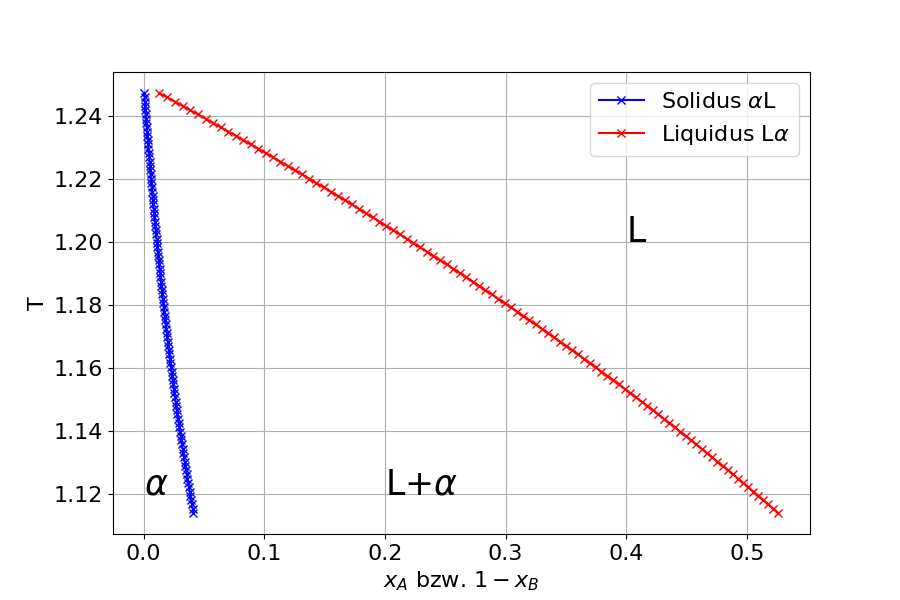

Text(0.4, 1.2, 'L')

In [20]:
fig_SL1, ax_SL1 = plt.subplots()
ax_SL1.set_xlabel(xlab)
ax_SL1.set_ylabel("T")
ax_SL1.plot(Solidus_aL, Solidus_aT, '-xb', label=r'Solidus $\alpha$L')
ax_SL1.plot(Liquidus_La, Liquidus_Ta, '-xr', label=r'Liquidus L$\alpha$')
ax_SL1.legend()
#ax_SL1.text(0.5, 0.95 ,r"Beispiel $\gamma^2$",fontsize=25) # x, y wie im Koordinatensystem, gefolgt vom Text
ax_SL1.text(0.2, 1.12 ,r"L+$\alpha$",fontsize=25) 
ax_SL1.text(0.0, 1.12 ,r"$\alpha$",fontsize=25) 
ax_SL1.text(0.4, 1.2 ,r"L",fontsize=25) 

In [21]:
xbl = symbols(r'x_{\beta\ L}',real=True, positive=True)
xlb = symbols(r'x_{L\beta}', real=True, positive=True)
Solidus_bL=[]
Solidus_bT=[]
Liquidus_Lb=[]
Liquidus_Tb=[]

xlb_val = 0.01
xbl_val = 0.1
Tlow = Te - 0.01 #min(T_M_A_beta_val, T_M_B_beta_val) 
Thigh =  max(T_M_A_beta_val, T_M_B_beta_val) 
for Ti in range(1,Num_Temp):
    T_val = Tlow-(Tlow-Thigh)*Ti/(Num_Temp+1)
    xlb_val, xbl_val = calc_eq(
        T_val, G_L, G_beta, dG_L_dx, dG_beta_dx,
        xlb, xbl, xlb_val, xbl_val) 
    print("T=%f"%T_val,"x_bL=",xbl_val," x_Lb=",xlb_val)
    Solidus_bL.append(xbl_val)
    Solidus_bT.append(T_val)
    Liquidus_Lb.append(xlb_val)
    Liquidus_Tb.append(T_val)
    
    
Solidus_bL=np.array(Solidus_bL)
Solidus_bT=np.array(Solidus_bT)
Liquidus_Lb=np.array(Liquidus_Lb)
Liquidus_Tb=np.array(Liquidus_Tb)

T=1.113586 x_bL= 0.853670455229167  x_Lb= 0.458198985692361
T=1.114450 x_bL= 0.855000374693713  x_Lb= 0.461997880588760
T=1.115314 x_bL= 0.856332025294253  x_Lb= 0.465823250127412
T=1.116178 x_bL= 0.857665434649109  x_Lb= 0.469675256256288
T=1.117043 x_bL= 0.859000630425821  x_Lb= 0.473554061934283
T=1.117907 x_bL= 0.860337640342486  x_Lb= 0.477459831139178
T=1.118771 x_bL= 0.861676492169106  x_Lb= 0.481392728875688
T=1.119635 x_bL= 0.863017213728929  x_Lb= 0.485352921183572
T=1.120499 x_bL= 0.864359832899810  x_Lb= 0.489340575145847
T=1.121363 x_bL= 0.865704377615567  x_Lb= 0.493355858897066
T=1.122227 x_bL= 0.867050875867350  x_Lb= 0.497398941631689
T=1.123092 x_bL= 0.868399355705012  x_Lb= 0.501469993612532
T=1.123956 x_bL= 0.869749845238491  x_Lb= 0.505569186179305
T=1.124820 x_bL= 0.871102372639189  x_Lb= 0.509696691757238
T=1.125684 x_bL= 0.872456966141372  x_Lb= 0.513852683865784
T=1.126548 x_bL= 0.873813654043560  x_Lb= 0.518037337127417
T=1.127412 x_bL= 0.875172464709939  x_Lb

<IPython.core.display.Javascript object>


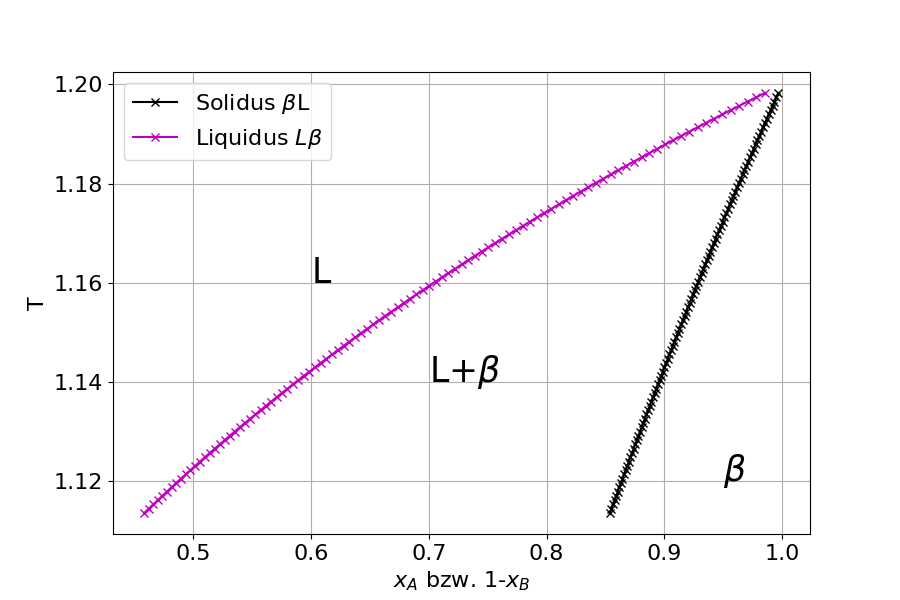

Text(0.6, 1.16, 'L')

In [22]:
fig_SL2, ax_SL2 = plt.subplots()
ax_SL2.set_xlabel("$x_A$ bzw. 1-$x_B$")
ax_SL2.set_ylabel("T")
ax_SL2.plot(Solidus_bL, Solidus_bT, '-xk', label=r'Solidus $\beta$L')
ax_SL2.plot(Liquidus_Lb, Liquidus_Tb, '-xm', label=r'Liquidus $L\beta$')
ax_SL2.legend()
#ax_SL2.text(0.4, 1.06 ,r"Beispiel $\gamma^2$",fontsize=25) # x, y wie im Koordinatensystem, gefolgt vom Text
ax_SL2.text(0.7, 1.14 ,r"L+$\beta$",fontsize=25) 
ax_SL2.text(0.95, 1.12 ,r"$\beta$",fontsize=25) 
ax_SL2.text(0.6, 1.16 ,r"L",fontsize=25)  

<IPython.core.display.Javascript object>


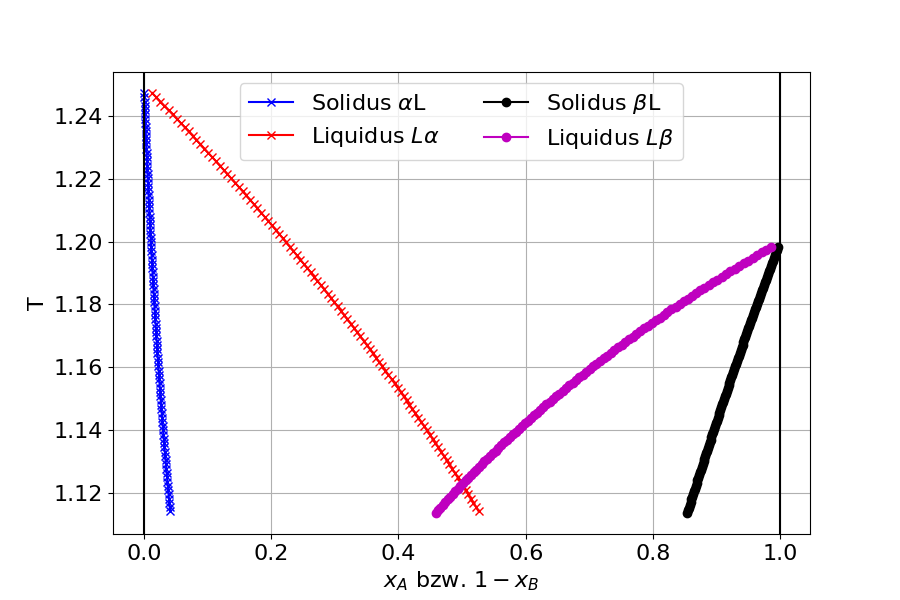

In [23]:
fig_SL12, ax_SL12 = plt.subplots()
ax_SL12.set_xlabel(xlab)
ax_SL12.set_ylabel("T")
ax_SL12.plot(Solidus_aL, Solidus_aT, '-xb', label=r'Solidus $\alpha$L')
ax_SL12.plot(Liquidus_La, Liquidus_Ta, '-xr', label=r'Liquidus $L\alpha$')
ax_SL12.plot(Solidus_bL, Solidus_bT, '-ok', label=r'Solidus $\beta$L')
ax_SL12.plot(Liquidus_Lb, Liquidus_Tb, '-om', label=r'Liquidus $L\beta$')
ax_SL12.axvline(0, color='black')
ax_SL12.axvline(1, color='black')
ax_SL12.legend(ncol=2)

Was impliziert der Schnittpunkt der Liquiduskurven? Warum kann dieselbe Argumentation nicht für den Schnittpunkt der Soliduskurven angewandt werden?

Die Existenz eines Dreiphasengleichgewichts, da die Gleichgewichtsbedingungen der Phasenpaare $\alpha+L$ und $\beta+L$ gleichzeitig erfüllt sind. 

In diesem Fall wandelt eine eutektische Reaktion jegliche Restschmelze schon bei der eutektischen Temperatur um, d.h. beim Schnittpunkt der Soliduskurven liegt keine Schmelze mehr vor. Weiterhin liegen sonst keine Phasen mehr vor, d.h. eine weitere Reaktion ist nicht möglich. 

<h3>Aufgabe 1e)<br/>
Gleichgewichtsberechnung für die Fest-Fest Phasenpaare
</h3>

In [24]:
xab = symbols(r'x_{\alpha\ \beta}',real=True, positive=True)
xba = symbols(r'x_{\beta\ \alpha}', real=True, positive=True)
    
Solvus_ab=[]
Solvus_ba=[]
Solvus_abT=[]
Solvus_baT=[]
Num_Temp2 = Num_Temp
Num_Temp = 15

# A ist links, B ist rechts
xab_val = 0.1
xba_val = 0.9
Thigh = Te + 0.05
Tlow = Te-0.05
for Ti in range(1,Num_Temp):
    T_val = Tlow-(Tlow-Thigh)*Ti/(Num_Temp+1)
    xab_val, xba_val = calc_eq(
        T_val, G_alpha, G_beta, dG_alpha_dx, dG_beta_dx,
        xab, xba, xab_val, xba_val) 
    print("T=%f"%T_val,"x_ab=",xab_val," x_ba=",xba_val)
    Solvus_ab.append(xab_val)
    Solvus_abT.append(T_val)
    Solvus_ba.append(xba_val)
    Solvus_baT.append(T_val)
    
Solvus_ab=np.array(Solvus_ab)
Solvus_ba=np.array(Solvus_ba)
Solvus_abT=np.array(Solvus_abT)
Solvus_baT=np.array(Solvus_baT)
Num_Temp = Num_Temp2


T=1.078972 x_ab= 0.0349908598368083  x_ba= 0.886183914472369
T=1.085222 x_ab= 0.0353412916714266  x_ba= 0.883639749829025
T=1.091472 x_ab= 0.0356886099153351  x_ba= 0.881068955936053
T=1.097722 x_ab= 0.0360327414318860  x_ba= 0.878471722128698
T=1.103972 x_ab= 0.0363736145116460  x_ba= 0.875848239396638
T=1.110222 x_ab= 0.0367111588641300  x_ba= 0.873198700234238
T=1.116472 x_ab= 0.0370453056089187  x_ba= 0.870523298495179
T=1.122722 x_ab= 0.0373759872661928  x_ba= 0.867822229251453
T=1.128972 x_ab= 0.0377031377467152  x_ba= 0.865095688656654
T=1.135222 x_ab= 0.0380266923412919  x_ba= 0.862343873813519
T=1.141472 x_ab= 0.0383465877097411  x_ba= 0.859566982645662
T=1.147722 x_ab= 0.0386627618693985  x_ba= 0.856765213773460
T=1.153972 x_ab= 0.0389751541831894  x_ba= 0.853938766393994
T=1.160222 x_ab= 0.0392837053472915  x_ba= 0.851087840165026


<IPython.core.display.Javascript object>


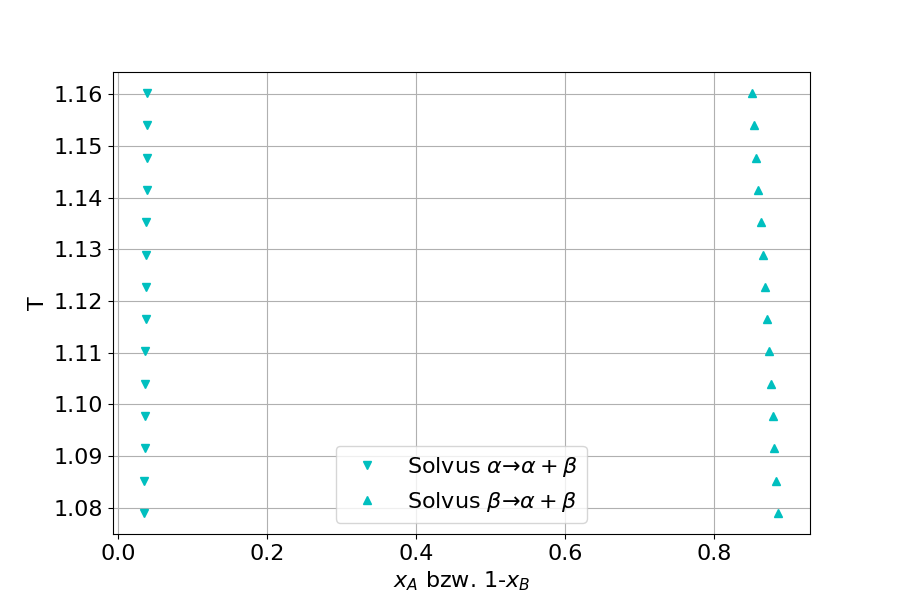

In [25]:
fig_Sol, ax_Sol = plt.subplots()
ax_Sol.set_xlabel("$x_A$ bzw. 1-$x_B$")
ax_Sol.set_ylabel("T")
ax_Sol.plot(Solvus_ab, Solvus_abT, 'vc', label=r'Solvus $\alpha \to \alpha+\beta$')
ax_Sol.plot(Solvus_ba, Solvus_baT, '^c', label=r'Solvus $\beta \to \alpha+\beta$')
ax_Sol.legend()

<IPython.core.display.Javascript object>


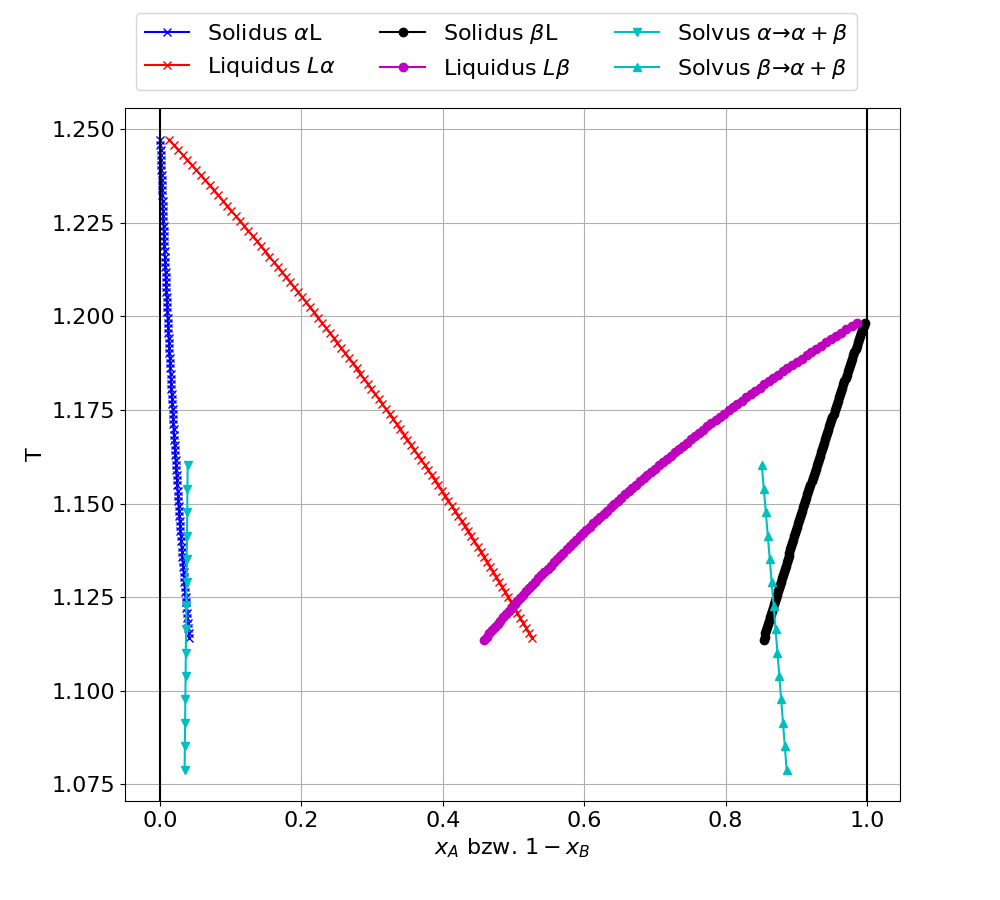

In [26]:
fig_all, ax_all = plt.subplots(figsize=(10,9))
ax_all.set_xlabel(xlab)
ax_all.set_ylabel("T")
ax_all.plot(Solidus_aL, Solidus_aT, '-xb', label=r'Solidus $\alpha$L')
ax_all.plot(Liquidus_La, Liquidus_Ta, '-xr', label=r'Liquidus $L\alpha$')
ax_all.plot(Solidus_bL, Solidus_bT, '-ok', label=r'Solidus $\beta$L')
ax_all.plot(Liquidus_Lb, Liquidus_Tb, '-om', label=r'Liquidus $L\beta$')
ax_all.plot(Solvus_ab, Solvus_abT, '-vc', label=r'Solvus $\alpha \to \alpha+\beta$')
ax_all.plot(Solvus_ba, Solvus_baT, '-^c', label=r'Solvus $\beta \to \alpha+\beta$')
ax_all.legend(loc='lower left', bbox_to_anchor= (0.0, 1.01), ncol=3)
ax_all.axvline(0, color='black')
ax_all.axvline(1, color='black')

<h3>Aufgabe 1f)<br/>
Stabiles Phasendiagramm
</h3>

Bestimmen Sie nun aufgrund der vorhergehenden Aufgaben das stabile Phasendiagramm und stellen Sie dieses dar.

Sie können die Ergebnisse filtern, indem sie eine Bedingung als Index verwenden. Als Bedingung können sie direkt einen Vergleich zwischen einem Array und einer Zahl benutzen, die Zahl wird dann gegen jedes Element des Arrays verglichen. Im folgenden Beispiel werden nur die Elemente von Solidus_bL ausgegeben, bei denen an der selben Stelle die Solidustemperatur Solidus_bT größer oder gleich 1.1 ist.

Hinweis: Die eutektische Temperatur ist in der Variablen Te_val verfügbar.

In [27]:
#Solidus_bL[Solidus_bT >= 1.1]

In [28]:
Solidus_stab_bL = Solidus_bL[\
                             Solidus_bT >= Te_val] 
Solidus_stab_bT = Solidus_bT[\
               Solidus_bT >= Te_val] 
Solidus_stab_aL = Solidus_aL[\
                             Solidus_aT >= Te_val] 
Solidus_stab_aT = Solidus_aT[\
               Solidus_aT >= Te_val] 

Liquidus_stab_Lb = Liquidus_Lb[\
                Liquidus_Tb >= Te_val] 
Liquidus_stab_Tb = Liquidus_Tb[\
                Liquidus_Tb >= Te_val] 
Liquidus_stab_La = Liquidus_La[\
                Liquidus_Ta >= Te_val] 
Liquidus_stab_Ta = Liquidus_Ta[\
                Liquidus_Ta >= Te_val] 

Solvus_stab_ab = Solvus_ab[\
              Solvus_abT <= Te_val] 
Solvus_stab_ba = Solvus_ba[\
              Solvus_baT <= Te_val] 
Solvus_stab_abT = Solvus_abT[\
               Solvus_abT <= Te_val] 
Solvus_stab_baT = Solvus_baT[\
               Solvus_baT <= Te_val] 



<IPython.core.display.Javascript object>


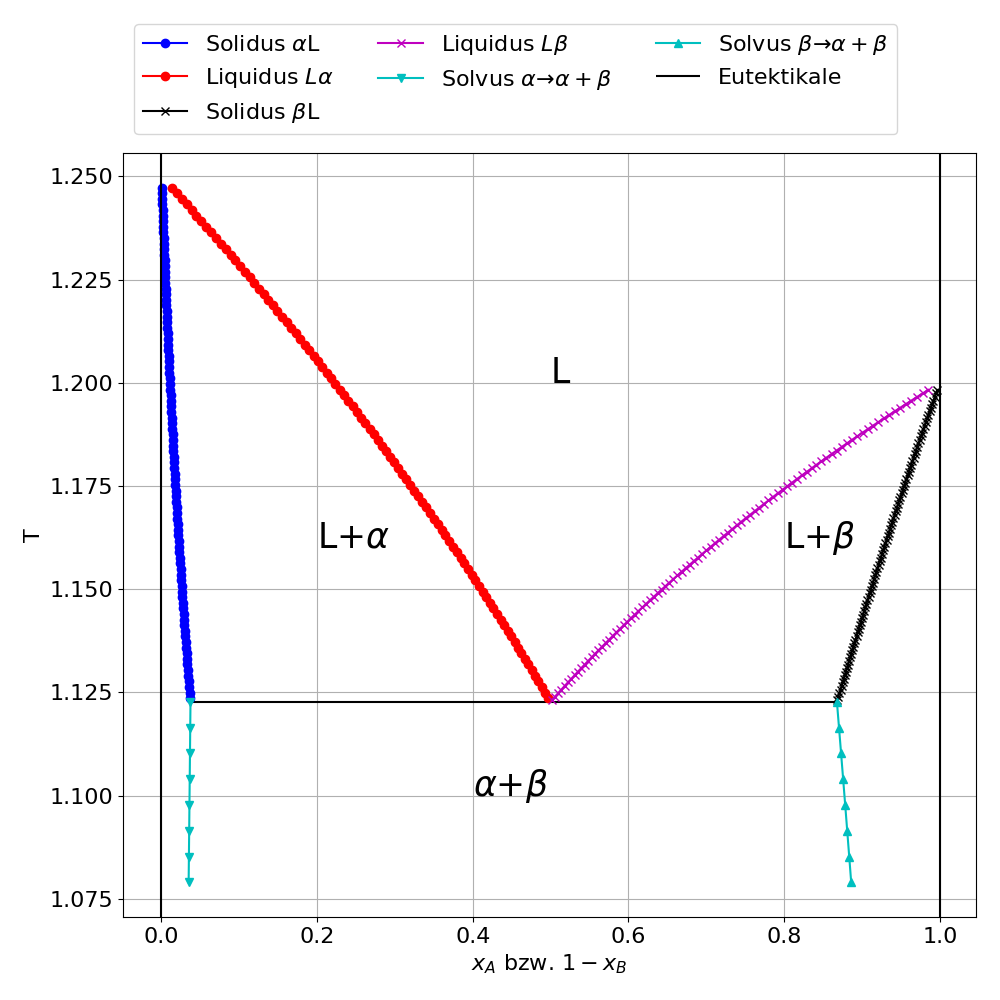

In [29]:
fig_all, ax_all = plt.subplots(figsize=(10,10))
ax_all.set_xlabel(xlab)
ax_all.set_ylabel("T")
ax_all.plot(Solidus_stab_aL, Solidus_stab_aT, '-ob',  label=r'Solidus $\alpha$L')
ax_all.plot(Liquidus_stab_La, Liquidus_stab_Ta, '-or', label=r'Liquidus $L\alpha$')
ax_all.plot(Solidus_stab_bL, Solidus_stab_bT, '-xk', label=r'Solidus $\beta$L')
ax_all.plot(Liquidus_stab_Lb, Liquidus_stab_Tb, '-xm', label=r'Liquidus $L\beta$')

ax_all.plot(Solvus_stab_ab, Solvus_stab_abT, '-vc', label=r'Solvus $\alpha \to \alpha+\beta$')
ax_all.plot(Solvus_stab_ba, Solvus_stab_baT, '-^c', label=r'Solvus $\beta \to \alpha+\beta$')
ax_all.hlines(float(Te), float(xae), float(xbe), label="Eutektikale", color="black") 
# fall er bei hlines rummeckert: float() drum rum wie drüber, er bekommt die Umwandlung selber nicht hin ### hide ###
ax_all.legend(loc='lower left', bbox_to_anchor= (0.0, 1.01), ncol=3)
fig_all.tight_layout()
ax_all.axvline(0, color='black')
ax_all.axvline(1, color='black')
ax_all.text(0.5, 1.2 ,"L",fontsize=25) 
ax_all.text(0.2, 1.16 ,r"L+$\alpha$",fontsize=25) 
ax_all.text(0.8, 1.16 ,r"L+$\beta$",fontsize=25) 
ax_all.text(0.4, 1.1 ,r"$\alpha$+$\beta$",fontsize=25) 
fig_all.savefig("phasendiagramm.pdf")

Das Phasendiagramm ist im Moment etwas ungünstig und grob gerastert.
Erhöhen Sie die Variable Num_Temp bei 1d) auf 50 und ändern Sie die Variable Tlow in den Zellen von 1d) auf Te-0.01.
Berechnen Sie danach das Phasendiagramm erneut, indem Sie im Reiter oben auf "Kernel" und dann "Restart & Run All" klicken. 

Während der Berechnung können Sie mit der nächsten Aufgabe fortfahren, das vorläufige Phasendiagramm liegt im Ordner als "phasendiagramm.pdf" gespeichert vor.

<h3>Aufgabe 1g)<br/>
Mikrostrukturentwicklung
</h3>

Wie sieht die Mikrostruktur einer Legierung der Zusammensetzung $x_A=0.4$ aus, wenn langsam aus der Schmelze bis $T=1.1$ abgekühlt wird? Was passiert mit einer Legierung von eutektischer Zusammensetzung? Gehen Sie dabei auf die Morphologie sowie die Massenanteile der Phasen und des Eutektikums ein.

Es entsteht zunächst der $\alpha$-Mischkristall aus der Schmelze. Falls dieser anisotrope Grenzflächeneigenschaften besitzt, bildet sich dieser dendritisch aus, falls nicht, zellulär. Während die $\alpha$-Schmelze-Mischregion langsam durchlaufen wird, geben die Phasengrenzen die Konzentration  an der Phasengrenze an, während das Hebelgesetz die Masseverhältnisse der beiden Phasen beschreibt. 

Sobald die eutektische Temperatur unterschritten wird, wandelt sich die Schmelze zu einem $\alpha-\beta$-Eutektikum mit dem Masseverhältnis der eutektischen Zusammensetzung.  Insgesamt ergibt sich also ein dendritisch oder zelluläres Gefüge, dessen Zwischenräume mit lamellaren Eutektikum gefüllt sind. 

Im Falle der eutektischen Zusammensetzung wandelt die gesamte Schmelze ab der eutektischen Temperatur in ein Eutektikum um, ohne dass dabei zelluläre oder dendritische Morphologien entstehen. 

Was passiert, wenn man diese Mikrostrukturen wieder über die Liquidustemperatur aufheizt?

Beim Aufheizen wird das Eutektikum zuerst schmelzen, gefolgt von der $\alpha$-Phase in zellulärer/dendritischer Form. 

Bonusfragen: Warum bildet sich das Eutektikum im Masseverhältnis der eutektischen Zusammensetzung? Warum bildet es sich in einer lamellaren Form aus anstatt in einer Matrix-Faser-Struktur? 